# 붓꽃 품종 분류

## 패키지 로딩

In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## 데이터 로딩 및 분할

In [2]:
x, y = load_iris(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10, stratify=y)

## 모델 생성 및 학습 

In [3]:
model = KNeighborsClassifier(n_neighbors=3)  # n_neighbors: K의 개수 지정
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## 예측 및 평가

In [4]:
y_hat = model.predict(x_test)
con_mat = confusion_matrix(y_test, y_hat)
print(con_mat)

[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


## 데이터 분포 시각화

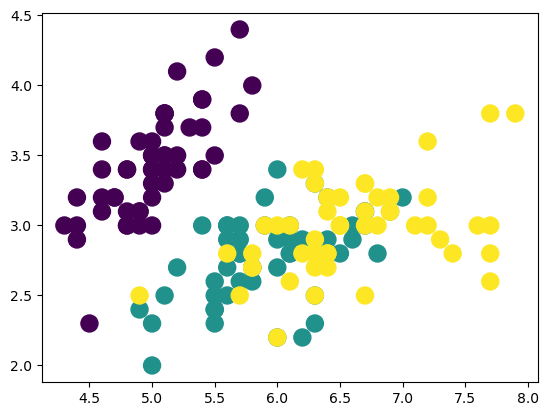

In [9]:
import matplotlib.pyplot as plt

# 독립변수가 4개(4차원)이기때문에 변수 중 두개를 골라 시각화
plt.scatter(x[:,0], x[:,1], c=y, s=150)
plt.show()
# 한개의 품종(보라색)은 꽃잎의 길이와 넓이가 차별화

## 최적의 K 찾기

In [12]:
import numpy as np

k = 10
acc_score = np.zeros(k)  # 0이 10개로 채워진 벡터
for k in range(1, k+1):
    model = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
    y_hat = model.predict(x_test)
    acc = accuracy_score(y_test, y_hat)
    acc_score[k-1] = acc
    # k값을 1씩 늘려가면서 정확도 확인

max_index = np.argmax(acc_score)
print(acc_score)
print(f'최적의 K는 {max_index+1}이며, 정확도는 {acc_score[max_index]:.3f}이다.')

[1.         1.         1.         0.97777778 1.         1.
 1.         1.         1.         0.97777778]
최적의 K는 1이며, 정확도는 1.000이다.


# MNIST 손글씨 분류
- MNIST(Modified National Institute of Standard and Technology)
- 손으로 쓴 숫자들로 이루어진 데이터베이스 활용

## 데이터 로딩

In [13]:
from sklearn.datasets import fetch_openml  #ML용 공개데이터 읽어올 때 사용하는 함수

mnist = fetch_openml('mnist_784', version=1, parser='pandas')
# parser='pandas': pd DataFrame으로 변환가능한 번치 객체로 가져옴
print(type(mnist))

<class 'sklearn.utils._bunch.Bunch'>


## 데이터 모양 확인
- 전체 70,000개 이미지와 784개의 특성값(28x28 pixel 이미지)을 가지고 있다.

In [16]:
x = mnist.data
y = mnist.target

print(x.shape, y.shape)
print(type(x), type(y))
display(x.head())

(70000, 784) (70000,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 숫자 데이터 이미지화

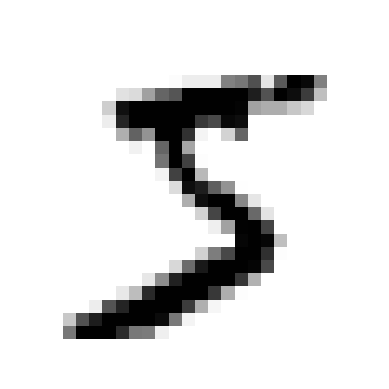

In [17]:
import matplotlib.pyplot as plt

img_data = x.iloc[0].values.reshape(28,28)  # 0번째 행의 시리즈를 데이터값을 가져와 28x28 배열로
plt.imshow(img_data, cmap='binary')  #imshow: 이미지를 보여주는 속성
plt.axis('off')  # 축값 삭제
plt.show()

## 학습 데이터, 평가 데이터 분리
- MNIST 데이터셋은 이미 학습데이터(앞쪽 6만개)와 평가데이터(뒤쪽 1만개)로 나누어져 있음.

In [18]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

## 모델 생성 및 학습

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

## 예측 및 평가

In [21]:
y_hat = knn.predict(x_test)
print(f'정확도: {accuracy_score(y_test, y_hat):.3f}')

정확도: 0.969


In [23]:
from sklearn.metrics import roc_auc_score

pred_proba = knn.predict_proba(x_test)
print(f"AUC:{roc_auc_score(y_test, pred_proba, multi_class='ovr'):.3f}")

AUC:0.995


In [24]:
knn.predict(img_data.reshape(1, -1))

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

<class 'numpy.ndarray'>
(28, 28, 4)


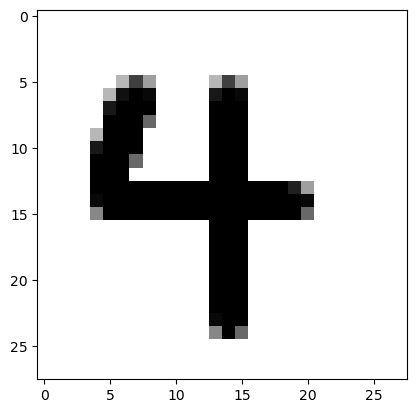

In [37]:
img = plt.imread('./dataset/44.png')
plt.imshow(img)
plt.show

print(type(img))
print(img.shape)


In [32]:
y_hat = knn.predict(img)
print(f'정확도: {accuracy_score(y_test, y_hat):.3f}')

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: Found array with dim 3. KNeighborsClassifier expected <= 2.